In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import display, HTML

import warnings 
warnings.simplefilter("ignore")

Данные к заданиям 1—3 находятся в файле Ch56data.xlsx.
1. На листе Problem 1 перечислено количество автомобилей, каждый день запаркованных как на открытой, так и закрытой автостоянке возле бизнес-школы Kelley School of Business Университета Индианы. Найдите коэффициент корреляции и объясните корреляцию между количеством автомобилей, запаркованных на открытой и закрытой стоянках.
2. На листе Problem 2 указаны ежедневные объемы продаж (в долларах) для лазерных принтеров, картриджей и канцелярских принадлежностей. Найдите коэффициенты корреляции и объясните корреляцию между этими величинами.
3. На листе Problem 3 показаны годовые доходы по акциям, казначейским векселям и облигациям. Найдите коэффициенты корреляции и объясните корреляцию между годовыми доходами по этим трем классам инвестиций.

In [2]:
parking = pd.read_excel('~/Study/excel/Ch56/Practice Files/Ch56data.xlsx', skiprows=2, usecols=range(2,4))

In [3]:
parking

,Outdoor,Garage
0,140,180
1,120,200
2,130,190
3,110,210
4,160,160
5,135,185


In [4]:
parking.corr()

,Outdoor,Garage
Outdoor,1.0,-1.0
Garage,-1.0,1.0


*Цифры показывают строго отрицательную линейную связь. Когда идет дождь или жарко или холодно, гараж, вероятно, чаще используется. В противном случае люди, скорее всего, предпочтут парковаться на улице.*

In [5]:
laser = pd.read_excel('~/Study/excel/Ch56/Practice Files/Ch56data.xlsx',
                      skiprows=1, usecols=range(2,5), sheet_name='Problem 2')

In [7]:
laser.head()

,Laser Printers,Cartridges,School Supplies
0,17291,4379,3618
1,13734,2258,3514
2,18802,4206,3587
3,12171,2137,3007
4,16402,3775,3850


In [8]:
laser.corr()

,Laser Printers,Cartridges,School Supplies
Laser Printers,1.000000,0.859024,0.167991
Cartridges,0.859024,1.000000,0.142642
School Supplies,0.167991,0.142642,1.000000


*Когда спрос на принтеры высок, он также высок и для картриджей. Когда спрос на школьные принадлежности высок,
это мало что говорит о спросе на принтеры или картриджи.*

In [14]:
stocks = pd.read_excel('~/Study/excel/Ch56/Practice Files/Ch56data.xlsx',
                      skiprows=6, usecols=range(4), sheet_name='Problem 3')

In [17]:
stocks.head()

,Year,Stocks,T.Bills,T.Bonds
0,1928,0.4381,0.0308,0.0084
1,1929,-0.0830,0.0316,0.0420
2,1930,-0.2512,0.0455,0.0454
3,1931,-0.4384,0.0231,-0.0256
4,1932,-0.0864,0.0107,0.0879


In [20]:
stocks.loc[:,'Stocks': 'T.Bonds'].corr()

,Stocks,T.Bills,T.Bonds
Stocks,1.000000,-0.001443,0.123372
T.Bills,-0.001443,1.000000,0.382041
T.Bonds,0.123372,0.382041,1.000000


*Знания о доходности казначейских векселей мало что нам говорят о доходности акций. Векселя и облигации демонстрируют умеренную положительную корреляцию так что, если доходность векселей растет, это немного увеличивает вероятность того, что облигации будут приносить больше. Это потому, что доходность как по облигациям, так и по векселям связаны с изменением процентных ставок. Акции и облигации имеют небольшую положительную взаимосвязь.*

***
В файле Dow.xlsx находятся ежемесячные данные о доходах по 30 акциям, входящим в индекс Доу—Джонса. Найдите коэффициенты корреляции для всех акций. Затем для каждой акции с помощью условного форматирования выделите три акции, наиболее коррелированные с этой акцией. (Безусловно, корреляция акции с ней самой не должна быть выделена.)

In [21]:
dow = pd.read_excel('~/Study/excel/Ch56/Practice Files/Dow.xlsx', skiprows=2).dropna()

In [22]:
dow.head()

,Date,AA,AIG,AXP,BA,C,CAT,DD,DIS,GE,...,MO,MRK,MSFT,PFE,PG,T,UTX,VZ,WMT,XOM
1,1986-08-01,0.096296,0.050093,0.098028,0.029596,0.096273,0.117634,0.083816,-0.056842,0.076986,...,0.055556,0.085634,0.000000,0.018727,0.033993,0.108804,0.115487,0.027211,0.010753,0.133663
2,1986-09-02,0.000000,-0.128975,-0.140898,-0.123193,-0.075127,-0.240577,-0.027316,-0.134341,-0.085856,...,-0.128289,-0.148071,-0.008772,-0.147059,-0.153125,-0.085182,-0.079119,-0.147417,-0.106383,-0.023523
3,1986-10-01,-0.016757,-0.008114,0.042380,-0.009367,0.073511,0.052798,0.073390,0.110886,0.060943,...,0.109434,0.102741,0.371681,0.030172,0.107011,0.011792,0.014911,0.038838,0.068571,0.011152
4,1986-11-03,-0.048103,-0.509202,-0.019215,-0.035552,-0.031386,-0.006269,0.039186,-0.017092,0.088525,...,0.010204,0.017308,0.283871,0.020921,0.036667,0.043077,0.040812,0.033647,0.061275,0.018382
5,1986-12-01,-0.021658,0.018833,-0.009370,0.002549,-0.008837,0.012617,-0.060087,0.000000,0.036145,...,-0.032054,0.120995,-0.030151,0.000000,-0.017749,0.003397,0.030697,-0.023438,-0.023725,0.012563


In [28]:
def highlight_top_corr(s, n=3):
    is_top = s.isin(s.nlargest(n+1)[1:])
    return ['background-color: yellow' if v else '' for v in is_top]

In [47]:
def plot_pandas_style(styler):
    html = '\n'.join([line.lstrip() for line in styler.render().split('\n')])
    return HTML(html)

In [48]:
html = (dow.iloc[:, 1:].corr().style \
               .apply(highlight_top_corr, axis=1)
        )
plot_pandas_style(html)

,AA,AIG,AXP,BA,C,CAT,DD,DIS,GE,GM,HD,HON,HPQ,IBM,INTC,JNJ,JPM,KO,MCD,MMM,MO,MRK,MSFT,PFE,PG,T,UTX,VZ,WMT,XOM
AA,1.000000,0.105164,0.308128,0.226228,0.252854,0.407671,0.439350,0.230810,0.232524,0.349731,0.184191,0.434360,0.328851,0.341514,0.214153,0.126236,0.406691,0.077597,0.158575,0.333326,0.177343,0.162109,0.157876,0.014297,0.084508,0.173636,0.345643,0.170105,0.049176,0.180868
AIG,0.105164,1.000000,0.366789,0.180429,0.369851,0.252576,0.261840,0.289516,0.227178,0.122913,0.264332,0.236229,0.160263,0.144672,0.288897,0.260716,0.235436,0.224805,0.278175,0.177238,0.103645,0.232288,0.195010,0.435116,0.120428,0.258516,0.299153,0.184111,0.301456,0.159453
AXP,0.308128,0.366789,1.000000,0.303650,0.455004,0.208910,0.320027,0.337449,0.597213,0.360330,0.258062,0.359569,0.295139,0.261111,0.241688,0.252450,0.389269,0.219506,0.315223,0.196294,0.079347,0.168655,0.164936,0.192019,0.154857,0.356814,0.373519,0.214897,0.194598,0.170877
BA,0.226228,0.180429,0.303650,1.000000,0.207936,0.296687,0.390548,0.303696,0.192769,0.236922,0.187441,0.332733,0.123993,0.078353,0.140450,0.184004,0.201202,0.219518,0.333805,0.244968,0.132187,0.094490,0.117098,0.097723,0.121890,0.171719,0.371369,0.116586,0.044854,0.183365
C,0.252854,0.369851,0.455004,0.207936,1.000000,0.237044,0.240111,0.290785,0.279442,0.276663,0.177359,0.292508,0.237582,0.237725,0.173043,0.160501,0.495610,0.379786,0.227909,0.176168,0.060509,0.218428,0.151841,0.212038,0.148671,0.150643,0.342874,0.177848,0.215819,0.148660
CAT,0.407671,0.252576,0.208910,0.296687,0.237044,1.000000,0.344726,0.267874,0.164614,0.273675,0.261342,0.337187,0.183901,0.204583,0.214656,0.168525,0.269253,0.047979,0.223790,0.333691,0.094789,0.095902,0.089345,0.216949,0.115712,0.127762,0.354437,0.169125,0.015928,0.076718
DD,0.439350,0.261840,0.320027,0.390548,0.240111,0.344726,1.000000,0.330070,0.227484,0.239351,0.223205,0.340745,0.194961,0.229147,0.184955,0.215012,0.324822,0.232796,0.234623,0.307958,0.170233,0.211742,0.158165,0.060490,0.209198,0.163530,0.376136,0.183832,0.117260,0.314936
DIS,0.230810,0.289516,0.337449,0.303696,0.290785,0.267874,0.330070,1.000000,0.267459,0.306125,0.341025,0.314039,0.389107,0.231586,0.363434,0.164409,0.341798,0.380254,0.287172,0.217430,0.098046,0.393952,0.249983,0.206934,0.150256,0.116814,0.348930,0.184462,0.192505,0.135691
GE,0.232524,0.227178,0.597213,0.192769,0.279442,0.164614,0.227484,0.267459,1.000000,0.331425,0.208524,0.257250,0.251568,0.334578,0.287167,0.132459,0.218169,0.076527,0.259242,0.189486,0.049152,0.146962,0.326099,0.158709,0.017070,0.296723,0.334937,0.172377,0.229023,0.123928
GM,0.349731,0.122913,0.360330,0.236922,0.276663,0.273675,0.239351,0.306125,0.331425,1.000000,0.187970,0.266464,0.290037,0.339229,0.274235,0.016520,0.359799,0.085039,0.216831,0.180391,0.063223,0.136105,0.171106,0.124421,0.056068,0.068919,0.303332,0.068050,0.128328,0.193675


***
Команды НФЛ проводят в регулярном сезоне 16 игр. Предположим, что стандартное отклонение от количества выигранных игр для всех команд равно 2, и коэффициент корреляции между количеством выигранных командой игр в двух подряд идущих сезонах равен 0,5. Если команда идет в регулярном сезоне со счетом 12:4, каков наилучший прогноз для количества игр, которые команда выиграет в следующем сезоне?

*В этом году мы выиграли на 2 стандартных отклонения больше среднего (в среднем 8). Поэтому в следующем году мы прогнозируем, что выиграем на 0,5 (2) = 1 стандартное отклонение больше среднего, что составляет 10 игр.*

***
Фицци Драгс (Fizzy Drugs) должен оптимизировать продуктивность важного химического процесса. Компания считает, что количество произведенной продукции в фунтах при каждом запуске процесса зависит от размера используемого резервуара, давления и температуры. Привлеченные к решению задачи ученые считают, что результат изменения одной переменной может зависеть от значений других переменных. Резервуар должен иметь объем от 1,3 до 1,5 м3, кроме того, необходимо поддерживать давление между 4 и 4,5 мм рт. ст. и температуру между 22 и 30 градусами Цельсия. Ученые провели эксперименты для нижних и верхних уровней трех контрольных переменных, результаты которых представлены в файле Fizzy.xlsx.
1. Определите взаимосвязь между количеством продукции, объемом резервуара, температурой и давлением.
2. Рассмотрите взаимосвязь между давлением, объемом резервуара и температурой.
3. Какие значения температуры и давления и какой объем резервуара следует порекомендовать?

In [6]:
fizzy = pd.read_excel('~/Study/excel/Ch59/Practice Files/Fizzy.xlsx', skiprows=1)

In [19]:
fizzy.rename(columns={'S*P': 'SP', 'S*T': 'ST', 'P*T': 'PT'}, inplace=True)

In [20]:
model = smf.ols("Yield ~ Size + Pressure + Temperature + SP + ST + PT", data=fizzy).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1063.
Date:                Mon, 31 May 2021   Prob (F-statistic):           2.63e-12
Time:                        21:18:34   Log-Likelihood:                -61.030
No. Observations:                  16   AIC:                             136.1
Df Residuals:                       9   BIC:                             141.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.888e+04   1019.339    -18.525      0.000   -2.12e+04   -1.66e+04
Size         1.197e+04    666.719     17.959      0.000    1.05e+04    1.35e+04
Pressure     3825.6250    226.306     16.905      0.000    3313.685    4337.565
Temperature   111.0938     20.159      5.511      0.000      65.491     156.697
SP          -2012.5000    146.309    -13.755      0.000   -2343.473   -1681.527
ST            -89.8438      9.144     -9.825      0.000    -110.530     -69.158
PT              1.5625      3.658      0.427      0.679      -6.712       9.837
==============================================================================
Omnibus:                        0.280   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.870   Jarque-Bera (JB):                0.444
Skew:                           0.045   Prob(JB):                        0.801
Kurtosis:                       2.189   Cond. No.                     4.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Все факторы значимы, за исключением `P*T`, поэтому мы отбрасываем этот столбец и запустим модель снова.

In [25]:
model = smf.ols("Yield ~ Size + Pressure + Temperature + SP + ST - PT", data=fizzy).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1390.
Date:                Mon, 31 May 2021   Prob (F-statistic):           7.18e-14
Time:                        21:21:27   Log-Likelihood:                -61.191
No. Observations:                  16   AIC:                             134.4
Df Residuals:                      10   BIC:                             139.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.906e+04    896.718    -21.251      0.000   -2.11e+04   -1.71e+04
Size         1.197e+04    638.885     18.741      0.000    1.05e+04    1.34e+04
Pressure     3866.2500    196.781     19.647      0.000    3427.794    4304.706
Temperature   117.7344     12.299      9.573      0.000      90.331     145.138
SP          -2012.5000    140.201    -14.354      0.000   -2324.887   -1700.113
ST            -89.8438      8.763    -10.253      0.000    -109.368     -70.320
==============================================================================
Omnibus:                        0.640   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.726   Jarque-Bera (JB):                0.611
Skew:                           0.100   Prob(JB):                        0.737
Kurtosis:                       2.064   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Yield = -19056 + 11973 * Size + 3866 * Pressure + 118 * TEMP - 2012 SP - 90 * ST

1. По мере увеличения размера эффект увеличения давления уменьшается.
2. По мере увеличения размера эффект увеличения температуры уменьшается. Все значения `p` значимы.
3. Производство продукциии максимально при температуре и давлении самого большого значения.

***
В супермаркете Mr. D’s в течение 12 недель подряд проводились наблюдения за продажей (учитывалось количество продаж) консервированных томатов. (См. файл Grocery.xlsx.) Каждую неделю отслеживались следующие данные.
- Во все ли тележки были положены рекламные листовки о консервированных томатах?
- Каждому ли покупателю были вручены купоны на консервированные томаты?
- Была ли снижена цена (нет, на 1 или 2 цента)?

На основе этих данных определите, как перечисленные факторы влияют на продажи. Предскажите продажи консервированных томатов для недели, на которой в тележки были положены рекламные листовки, покупателям предлагались купоны, и цена на томаты была снижена на 1 цент.

In [28]:
grocery = pd.read_excel('~/Study/excel/Ch59/Practice Files/Grocery.xlsx', skiprows=3)

In [50]:
grocery.rename(columns={'Cart?': 'Cart', 'Coupon??': 'Coupon'}, inplace=True)

In [43]:
grocery['Cart?'] = grocery['Cart Notice?'].map({'Yes': 1, 'No': 0})
grocery['Coupon??'] = grocery['Coupon?'].map({'Yes': 1, 'No': 0})

In [46]:
grocery = pd.concat([grocery, pd.get_dummies(grocery['Price Reduction?'].astype(str), 
                                            drop_first=True, prefix='cents_off')], axis=1)

In [52]:
grocery

,Week,Cart Notice?,Coupon?,Price Reduction?,Sales,Cart,Coupon,cents_off_1,cents_off_2
0,1,Yes,Yes,0,36,1,1,0,0
1,2,Yes,Yes,1,38,1,1,1,0
2,3,Yes,Yes,2,40,1,1,0,1
3,4,Yes,No,0,40,1,0,0,0
4,5,Yes,No,1,42,1,0,1,0
5,6,Yes,No,2,44,1,0,0,1
6,7,No,Yes,0,12,0,1,0,0
7,8,No,Yes,1,20,0,1,1,0
8,9,No,Yes,2,30,0,1,0,1
9,10,No,No,0,8,0,0,0,0


In [53]:
model = smf.ols("Sales ~ Cart + Coupon + cents_off_1 + cents_off_2", data=grocery).fit()

In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     13.70
Date:                Mon, 31 May 2021   Prob (F-statistic):            0.00201
Time:                        22:41:40   Log-Likelihood:                -33.865
No. Observations:                  12   AIC:                             77.73
Df Residuals:                       7   BIC:                             80.15
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      14.5000      3.438      4.217      0.004       6.370      22.630
Cart           20.1667      3.075      6.558      0.000      12.895      27.438
Coupon         -1.1667      3.075     -0.379      0.716      -8.438       6.105
cents_off_1     5.0000      3.766      1.328      0.226      -3.906      13.906
cents_off_2    12.7500      3.766      3.385      0.012       3.844      21.656
==============================================================================
Omnibus:                        1.544   Durbin-Watson:                   2.215
Prob(Omnibus):                  0.462   Jarque-Bera (JB):                0.845
Skew:                          -0.209   Prob(JB):                        0.655
Kurtosis:                       1.769   Cond. No.                         4.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Скидка в 1 цент и купон не имеют значения, поэтому удалим их.

In [57]:
model = smf.ols("Sales ~ Cart + cents_off_2", data=grocery).fit()

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     26.72
Date:                Mon, 31 May 2021   Prob (F-statistic):           0.000164
Time:                        22:44:17   Log-Likelihood:                -35.310
No. Observations:                  12   AIC:                             76.62
Df Residuals:                       9   BIC:                             78.08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      16.4167      2.418      6.788      0.000      10.946      21.888
Cart           20.1667      3.059      6.592      0.000      13.247      27.087
cents_off_2    10.2500      3.245      3.159      0.012       2.910      17.590
==============================================================================
Omnibus:                        1.123   Durbin-Watson:                   2.230
Prob(Omnibus):                  0.570   Jarque-Bera (JB):                0.870
Skew:                          -0.419   Prob(JB):                        0.647
Kurtosis:                       1.982   Cond. No.                         2.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Листовка в корзине и скидка в 2 цента имеют большое значение. Наличие уведомления в тележке увеличивает продажи на 20. Скидка 2 цента увеличивает продажи на 10.

Прогноз для «тележки были положены рекламные листовки, покупателям предлагались купоны, и цена на томаты была снижена на 1 цент»: 16,41 + 20,17 = 36,58.

***
В файле Countryregion.xlsx для нескольких слаборазвитых стран содержатся следующие данные:
- детская смертность;
- уровень грамотности взрослого населения;
- процент учеников, закончивших начальную школу;
- ВНП на душу населения.
Исходя из этих данных, создайте уравнение для прогнозирования детской смертности. Имеются ли в этом наборе данных выбросы? Проинтерпретируйте коэффициенты полученного уравнения. В пределах каких значений 95% прогнозов по детской смертности должны быть точными?

In [65]:
сountries = pd.read_excel('~/Study/excel/Ch59/Practice Files/Countryregion.xlsx',
                          usecols=range(1, 6), skiprows=3).rename(columns={'Unnamed: 1': 'Country'})

In [70]:
сountries.columns = сountries.columns.str.replace(r'\(.*\)', '', regex=True)

In [71]:
сountries

,Country,Infant Mortality,age adult literacy,age finishing primary school,GNP per capita
0,Cuba,18,98,98,2000
1,Sri Lanka,20,85,92,3300
2,Costa Rica,19,94,84,5800
3,Vietnam,44,85,58,600
4,China,54,80,86,2400
5,South Africa,56,76,68,4000
6,Saudi Arabia,38,59,68,11000
7,Brazil,60,78,56,5600
8,Zimbawe,68,82,76,1800
9,Morocco,68,42,76,3400


In [78]:
model = smf.ols("Q('Infant Mortality') ~ Q('age adult literacy') \
+ Q('age finishing primary school') + Q('GNP per capita')", data=сountries).fit()

In [79]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q('Infant Mortality')   R-squared:                       0.846
Model:                               OLS   Adj. R-squared:                  0.788
Method:                    Least Squares   F-statistic:                     14.64
Date:                   Mon, 31 May 2021   Prob (F-statistic):            0.00130
Time:                           23:45:24   Log-Likelihood:                -44.347
No. Observations:                     12   AIC:                             96.69
Df Residuals:                          8   BIC:                             98.63
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           154.2055     16.152      9.547      0.000     116.958     191.452
Q('age adult literacy')              -0.6772      0.229     -2.961      0.018      -1.205      -0.150
Q('age finishing primary school')    -0.5982      0.276     -2.169      0.062      -1.234       0.038
Q('GNP per capita')                  -0.0029      0.001     -2.271      0.053      -0.006    4.52e-05
==============================================================================
Omnibus:                        0.686   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.710   Jarque-Bera (JB):                0.409
Skew:                           0.409   Prob(JB):                        0.815
Kurtosis:                       2.613   Cond. No.                     2.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
coeffs = model.params.values

In [89]:
predictions = (coeffs[0] + сountries.iloc[:, 2] * coeffs[1]
               + сountries.iloc[:, 3] * coeffs[2] + сountries.iloc[:, 4] * coeffs[3])

In [93]:
сountries['predictions'] = predictions
сountries['residuals'] = сountries['Infant Mortality'] - сountries['predictions'] # model.resid
сountries['residuals^2']  = сountries['residuals'] ** 2 

In [118]:
np.sqrt(model.scale) # Standard Error

11.933992311331808

In [94]:
сountries

,Country,Infant Mortality,age adult literacy,age finishing primary school,GNP per capita,predictions,residuals,residuals^2
0,Cuba,18,98,98,2000,23.359512,-5.359512,28.724365
1,Sri Lanka,20,85,92,3300,31.944569,-11.944569,142.672736
2,Costa Rica,19,94,84,5800,23.313134,-4.313134,18.603128
3,Vietnam,44,85,58,600,60.191428,-16.191428,262.162342
4,China,54,80,86,2400,41.555745,12.444255,154.859477
5,South Africa,56,76,68,4000,50.345801,5.654199,31.969970
6,Saudi Arabia,38,59,68,11000,41.355546,-3.355546,11.259689
7,Brazil,60,78,56,5600,51.483524,8.516476,72.530365
8,Zimbawe,68,82,76,1800,47.940709,20.059291,402.375168
9,Morocco,68,42,76,3400,70.342024,-2.342024,5.485078


Для альфа = 0,10 все три переменные значимы, поэтому я бы предсказал: MORT = 154,2 -0,68 * AL -0,60 * FS -0,0029 * GNP

Нет выбросов, потому что нет остатков > 23,87 (standard error ^ 2) по абсолютному значению.

При прочих равных (ceteris paribus), увеличение ВНП на 1000 долларов снижает количество смертей / 1000 рождений на 2,9. Повышение грамотности взрослого населения на 1% снижает смертность на 1000 рождений на 0,67. Увеличение на 1% детей, заканчивающих школу, снижает смертность на 1000 рождений на 0,6.

95% всех прогнозов с точностью до 2 standard error = 23,87 смертей на тысячу.

***
В файле Baseball96.xlsx содержатся следующие данные: засчитанные пробежки, одинарные, двойные, тройные удары, хоум-раны, кражи базы и уолки для каждой команды Главной лиги бейсбола в сезоне 1996 г. На основе этих данных определите влияние одиночных и двойных ударов, а также других действий на пробежки.

In [119]:
baseball = pd.read_excel('~/Study/excel/Ch59/Practice Files/Baseball96.xlsx', skiprows=1)

In [121]:
baseball.head()

,Team,Runs,Singles,Doubles,Triples,HR's,BB's,SB's
0,Cleveland,840,952,279,23,207,542,132
1,Chicago Sox,755,982,252,37,146,576,110
2,Boston,791,907,286,31,175,560,99
3,Minnesota,703,974,270,34,120,471,105
4,California,801,927,252,25,186,564,58


In [123]:
baseball.iloc[:, 2:].corr()

,Singles,Doubles,Triples,HR's,BB's,SB's
Singles,1.000000,0.208208,0.000673,-0.184959,0.157080,0.220060
Doubles,0.208208,1.000000,0.092167,0.115713,0.212787,0.082975
Triples,0.000673,0.092167,1.000000,-0.001340,-0.127301,0.017332
HR's,-0.184959,0.115713,-0.001340,1.000000,0.394244,0.098529
BB's,0.157080,0.212787,-0.127301,0.394244,1.000000,-0.087443
SB's,0.220060,0.082975,0.017332,0.098529,-0.087443,1.000000


In [129]:
model = smf.ols("""Runs ~ Singles + Doubles + Triples + Q("HR's") + Q("BB's") + Q("SB's")""", data=baseball).fit()

In [130]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Runs   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     56.97
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           6.55e-12
Time:                        00:33:24   Log-Likelihood:                -117.83
No. Observations:                  28   AIC:                             249.7
Df Residuals:                      21   BIC:                             259.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -396.9200     70.951     -5.594      0.000    -544.471    -249.369
Singles        0.5185      0.072      7.203      0.000       0.369       0.668
Doubles        0.7829      0.156      5.032      0.000       0.459       1.107
Triples        0.7800      0.559      1.396      0.177      -0.382       1.942
Q("HR's")      1.4060      0.143      9.800      0.000       1.108       1.704
Q("BB's")      0.3750      0.079      4.751      0.000       0.211       0.539
Q("SB's")      0.1635      0.116      1.409      0.173      -0.078       0.405
==============================================================================
Omnibus:                        7.582   Durbin-Watson:                   1.330
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                8.898
Skew:                           0.453   Prob(JB):                       0.0117
Kurtosis:                       5.609   Cond. No.                     2.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
pd.DataFrame({'Predicted Runs': model.predict(), 'Residuals': model.resid})

,Predicted Runs,Residuals
0,848.919480,-8.919480
1,777.643580,-22.643580
2,793.672267,-2.672267
3,708.500953,-5.500953
4,783.006265,17.993735
5,744.569308,4.430692
6,780.630148,15.369852
7,687.989047,52.010953
8,685.213783,5.786217
9,720.205867,9.794133


Мы видим, что сингл стоит 0,52 пробежки; двойной удар стоит 0,78 пробежки, тройной — 0,78 пробежки, хоум-ран — 1,41 пробежки. Кражи базы стоит 0,37 пробежки, уолки — 0,16.

***
В файле Cardata.xlsx приведена следующая информация для 392 моделей автомобилей:
- количество цилиндров;
- объем двигателя;
- мощность в лошадиных силах;
- вес;
- разгон;
- количество миль на галлон (горючего).
Определите уравнение для прогнозирования количества миль на галлон горючего. Почему все независимые переменные не являются значимыми?

In [137]:
cars = pd.read_excel('~/Study/excel/Ch59/Practice Files/Cardata.xlsx', skiprows=1, usecols=range(4, 10))

In [138]:
cars.head()

,cyl,disp,HP,wt,accel,mpg
0,8,304.0,193,4732,18.5,9.0
1,8,307.0,200,4376,15.0,10.0
2,8,360.0,215,4615,14.0,10.0
3,8,400.0,150,4997,14.0,11.0
4,8,350.0,180,3664,11.0,11.0


In [139]:
model = smf.ols("mpg ~ cyl + disp + HP + wt + accel", data=cars).fit()

In [140]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     186.9
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          9.82e-101
Time:                        01:01:00   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2252.
Df Residuals:                     386   BIC:                             2276.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2643      2.669     17.331      0.000      41.016      51.513
cyl           -0.3979      0.411     -0.969      0.333      -1.205       0.409
disp       -8.313e-05      0.009     -0.009      0.993      -0.018       0.018
HP            -0.0453      0.017     -2.716      0.007      -0.078      -0.012
wt            -0.0052      0.001     -6.351      0.000      -0.007      -0.004
accel         -0.0291      0.126     -0.231      0.817      -0.276       0.218
==============================================================================
Omnibus:                       38.561   Durbin-Watson:                   0.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.737
Skew:                           0.706   Prob(JB):                     3.53e-12
Kurtosis:                       4.111   Cond. No.                     3.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Перезапустим с переменными HP и wt, так как остальные имеют высокие значения `p-value`.

In [142]:
model = smf.ols("mpg ~ HP + wt", data=cars).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          3.06e-104
Time:                        01:03:12   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.6402      0.793     57.540      0.000      44.081      47.200
HP            -0.0473      0.011     -4.267      0.000      -0.069      -0.026
wt            -0.0058      0.001    -11.535      0.000      -0.007      -0.005
==============================================================================
Omnibus:                       35.336   Durbin-Watson:                   0.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.973
Skew:                           0.683   Prob(JB):                     1.04e-10
Kurtosis:                       3.974   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
cars.iloc[:, :-1].corr()

,cyl,disp,HP,wt,accel
cyl,1.000000,0.950823,0.842983,0.897527,-0.504683
disp,0.950823,1.000000,0.897257,0.932994,-0.543800
HP,0.842983,0.897257,1.000000,0.864538,-0.689196
wt,0.897527,0.932994,0.864538,1.000000,-0.416839
accel,-0.504683,-0.543800,-0.689196,-0.416839,1.000000


Количество цилиндров и объем двигателя сильно коррелируют с переменными, которые мы используем в модели, поэтому у нас мало возможностей для прогнозирования.

mpg = 45.64 - .0473HP - .00578WT

95% прогнозов с точностью до 8,48 миль на галлон (2 stderr).

In [147]:
np.sqrt(model.scale) * 2

8.480338935288858

***
В файле Priceads.xlsx находятся данные о еженедельных объемах продаж продукта, а также о цене продукта и расходах на рекламу. Объясните, как реклама и цена продукта влияют на объемы продаж.

In [154]:
ads = pd.read_excel('~/Study/excel/Ch59/Practice Files/Priceads.xlsx', skiprows=3, usecols=range(4, 10))

In [155]:
ads

,Sales,Price,Ad,A*P,Price^2,Ad^2
0,22845,8,1,8,64,1
1,20417,9,8,72,81,64
2,23761,5,3,15,25,9
3,22674,4,12,48,16,144
4,22782,7,5,35,49,25
...,...,...,...,...,...,...
160,20384,6,12,72,36,144
161,21130,6,11,66,36,121
162,23495,5,7,35,25,49
163,18869,10,9,90,100,81


In [162]:
model = smf.ols("Sales ~ Price + Ad + Q('A*P') + Price^2 + Ad^2", data=ads).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     519.2
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           1.66e-96
Time:                        15:15:40   Log-Likelihood:                -1225.6
No. Observations:                 165   AIC:                             2463.
Df Residuals:                     159   BIC:                             2482.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.501e+04    203.961    122.642      0.000    2.46e+04    2.54e+04
Price       -125.7259     33.886     -3.710      0.000    -192.650     -58.802
Ad           190.3781     31.279      6.086      0.000     128.602     252.154
Q('A*P')     -74.7745      4.440    -16.841      0.000     -83.544     -66.005
Price ^ 2     10.3721     16.256      0.638      0.524     -21.733      42.477
Ad ^ 2       -13.4344     16.527     -0.813      0.418     -46.076      19.207
==============================================================================
Omnibus:                       11.730   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.693
Skew:                          -0.657   Prob(JB):                      0.00175
Kurtosis:                       2.656   Cond. No.                         324.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Квадратичные переменные имеют высокое значение `p-value`, поэтому удалим их и повторим анализ.

In [164]:
model = smf.ols("Sales ~ Price + Ad + Q('A*P')", data=ads).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     870.6
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           3.08e-99
Time:                        15:18:49   Log-Likelihood:                -1226.1
No. Observations:                 165   AIC:                             2460.
Df Residuals:                     161   BIC:                             2473.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     2.5e+04    201.881    123.829      0.000    2.46e+04    2.54e+04
Price       -112.4146     29.452     -3.817      0.000    -170.576     -54.253
Ad           180.7063     28.936      6.245      0.000     123.563     237.849
Q('A*P')     -75.4171      4.354    -17.321      0.000     -84.016     -66.818
==============================================================================
Omnibus:                       12.003   Durbin-Watson:                   1.687
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.283
Skew:                          -0.686   Prob(JB):                      0.00131
Kurtosis:                       2.775   Cond. No.                         317.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Все переменные имеют низкое значение `p-value`, поэтому можем использовать их в уравнении для прогнозирования продаж. Стоимость и содержание рекламного объявления имеют взаимодействие, оказывающее влияние на всю модель.

При более высокой цене реклама оказывает меньше влияния на продажи.

***
Файл Teams.xlsx содержит следующие данные: засчитанные пробежки, хит-байпитчи, уолки, одиночные, двойные, тройные удары и хоум-раны для команд Главной лиги бейсбола в сезонах 2000—2006 гг.
- Исходя из этих данных, постройте модель, предсказывающую на основе статистики ударов, сколько очков получит команда за пробежки.
- Насколько точно эта модель предсказывает количество засчитанных пробежек для команды за сезон?
- Предположим, что команда имеет положительный остаток, превышающий в три раза стандартную ошибку регрессии. Что могло привести к такому результату?

In [169]:
teams = pd.read_excel('~/Study/excel/Ch59/Practice Files/Teams.xlsx', skiprows=1, usecols=range(10))

In [171]:
teams.head()

,Year,Runs,At Bats,Hits,singles,2B,3B,HR,BB+HBP,Team
0,2000,864,5628,1574,995,309,34,236,655,Anaheim Angels
1,2000,794,5549,1508,992,310,22,184,607,Baltimore Orioles
2,2000,792,5630,1503,988,316,32,167,653,Boston Red Sox
3,2000,978,5646,1615,1041,325,33,216,644,Chicago White Sox
4,2000,950,5683,1639,1078,310,30,221,736,Cleveland Indians


In [174]:
model = smf.ols("Runs ~ singles + Q('2B') + Q('3B') + HR + Q('BB+HBP')", data=teams).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Runs   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     411.0
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          2.10e-104
Time:                        16:00:32   Log-Likelihood:                -966.07
No. Observations:                 210   AIC:                             1944.
Df Residuals:                     204   BIC:                             1964.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -559.9971     35.522    -15.765      0.000    -630.034    -489.960
singles         0.6328      0.030     20.947      0.000       0.573       0.692
Q('2B')         0.7059      0.068     10.447      0.000       0.573       0.839
Q('3B')         1.2637      0.201      6.302      0.000       0.868       1.659
HR              1.4907      0.061     24.499      0.000       1.371       1.611
Q('BB+HBP')     0.3466      0.026     13.586      0.000       0.296       0.397
==============================================================================
Omnibus:                        2.291   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                2.034
Skew:                          -0.120   Prob(JB):                        0.362
Kurtosis:                       3.418   Cond. No.                     2.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [175]:
np.sqrt(model.scale) * 2 # 2stderr

48.86446613226026

Predict Runs = -560 + .632Singles + .71Doubles + 1.26Triples + 1.49HR + .346(BB+HBP)

91% разброса в оценках объясняется моделью. Для 95% команд ваш прогноз должен быть точным в пределах 48,86 раундов (около 6% от среднего количества забегов). Хоум-раны имеют самый большой вклад в пробежки.

***
Файл NFLinfo.xlsx содержит следующие данные для команд НФЛ в сезонах 2003—2006 гг.:
- Margin (преимущество) — количество очков, на которое команда опережает своего соперника;
- NYP/A — набранные ярды относительно попыток выполнить пас;
- YR/A — набранные ярды относительно попыток выполнить вынос;
- DNYP/A — набранные противником ярды относительно попыток выполнить пас;
- DYR/A — набранные противником ярды относительно попыток выполнить вынос;
- TO — перехваты, выполненные командой;
- DTO — перехваты, выполненные командой противника.
Показывают ли эти данные, что больше влияет на успех команды: эффективный пас или вынос?

В какое количество очков приблизительно обходится команде перехват мяча?

Многие футбольные болельщики считают, что для организации паса необходим эффективный вынос. Соответствуют ли данные такой точке зрения?

In [178]:
nfl = pd.read_excel('~/Study/excel/Ch59/Practice Files/NFLinfo.xlsx', skiprows=4, usecols=range(3,12))

In [180]:
nfl.head()

,Rk,Tm,Margin,NYP/A,YR/A,TO,DNYP/A,DYR/A,DTO
0,2003,Kansas City Chiefs,152,7.1,4.3,18,5.6,5.2,37
1,2003,Indianapolis Colts,111,7.1,3.7,20,5.9,4.5,30
2,2003,St. Louis Rams,119,6.2,3.6,39,5.6,4.8,46
3,2003,Green Bay Packers,135,6.6,5.0,32,5.5,4.1,32
4,2003,Tennessee Titans,111,7.4,3.3,21,6.2,3.8,34


In [183]:
nfl.iloc[:, 3:].corr()

,NYP/A,YR/A,TO,DNYP/A,DYR/A,DTO
NYP/A,1.000000,0.099904,-0.448268,0.010828,0.179653,0.153630
YR/A,0.099904,1.000000,-0.310130,0.065008,0.095019,-0.030657
TO,-0.448268,-0.310130,1.000000,-0.025207,-0.098246,-0.133140
DNYP/A,0.010828,0.065008,-0.025207,1.000000,0.275902,-0.299836
DYR/A,0.179653,0.095019,-0.098246,0.275902,1.000000,-0.144023
DTO,0.153630,-0.030657,-0.133140,-0.299836,-0.144023,1.000000


Мы обнаружили небольшую корреляцию (0,10) между хорошим раном и прохождением.
В защите это соотношение немного больше (0,18).
Если хороший ран привел к тому, что мы прошли пас, мы ожидаем большей корреляции.

In [181]:
model = smf.ols("Margin ~ Q('NYP/A') + Q('YR/A') + TO + DTO + Q('DNYP/A') + Q('DYR/A')", data=nfl).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Margin   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     122.0
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           6.94e-49
Time:                        16:51:57   Log-Likelihood:                -640.53
No. Observations:                 128   AIC:                             1295.
Df Residuals:                     121   BIC:                             1315.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      59.8082     69.971      0.855      0.394     -78.717     198.333
Q('NYP/A')     60.0998      4.529     13.271      0.000      51.134      69.065
Q('YR/A')      24.7916      7.574      3.273      0.001       9.798      39.786
TO             -3.5330      0.579     -6.099      0.000      -4.680      -2.386
DTO             3.8313      0.541      7.080      0.000       2.760       4.903
Q('DNYP/A')   -73.9773      6.466    -11.441      0.000     -86.778     -61.176
Q('DYR/A')    -21.0791      7.873     -2.677      0.008     -36.665      -5.493
==============================================================================
Omnibus:                        3.519   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                3.557
Skew:                           0.385   Prob(JB):                        0.169
Kurtosis:                       2.727   Cond. No.                         891.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Перехват мяча оценивается примерно в (3,53 + 3,83) / 2 = 3,68 очков.

Для организации паса проходимость намного важнее, чем рашинг.

***
В файле Qbinfo.xlsx перечислены рейтинги знаменитых квотербеков НФЛ в сезоне 2009 г. Рейтинг квотербеков основан на проценте завершенных пасов; проценте пасов, приведших к тачдаунам; набранных ярдов относительно попыток выполнить пас и проценте перехваченных пасов.
- Создайте формулу прогнозирования рейтинга квотербека на основе его статистики за сезон.
- Насколько точны прогнозы?

In [184]:
qb = pd.read_excel('~/Study/excel/Ch59/Practice Files/qbinfo.xlsx', skiprows=1)

In [185]:
qb.head()

,Name,Comp,Att,Yds,TD,Int,Comp %,TD %,Int %,YPA,Rating
0,"1. Drew Brees, New Orleans Saints",363,514,4388,34,11,0.706,0.066,0.021,8.54,109.6
1,"2. Brett Favre, Minnesota Vikings",364,532,4202,33,7,0.684,0.062,0.013,7.90,107.2
2,"3. Philip Rivers, San Diego Chargers",317,486,4254,28,9,0.652,0.058,0.019,8.75,104.4
3,"4. Aaron Rodgers, Green Bay Packers",350,541,4434,30,7,0.647,0.055,0.013,8.20,103.2
4,"5. Ben Roethlisberger, Pittsburgh Steelers",337,506,4328,26,12,0.666,0.051,0.024,8.55,100.5


In [186]:
model = smf.ols("Rating ~ Q('Comp %') + Q('TD %') + YPA + Q('Int %')", data=qb).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.449e+04
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           9.68e-49
Time:                        20:49:06   Log-Likelihood:                 18.173
No. Observations:                  29   AIC:                            -26.35
Df Residuals:                      24   BIC:                            -19.51
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7254      0.658      2.622      0.015       0.367       3.084
Q('Comp %')    82.4136      1.182     69.731      0.000      79.974      84.853
Q('TD %')     334.1169      4.162     80.285      0.000     325.528     342.706
YPA             4.2704      0.058     73.137      0.000       4.150       4.391
Q('Int %')   -411.6973      3.039   -135.478      0.000    -417.969    -405.425
==============================================================================
Omnibus:                        1.891   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.388   Jarque-Bera (JB):                1.317
Skew:                           0.521   Prob(JB):                        0.518
Kurtosis:                       2.941   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [187]:
np.sqrt(model.scale) * 2 # 2stderr

0.2842739167805502

In [192]:
upper = qb.Rating.mean() + 0.28
lower = qb.Rating.mean() - 0.28
lower, upper

(85.2993103448276, 85.8593103448276)

QB Rating = 1.72 + 82.41COMP% + 334.11TD% - 411.70Int% + 4.27YPA

95% точность в пределах ±0,28 от среднего. Рейтинг QB около 86.

***
Данные к этим заданиям находятся в файле Chapter60data.xlsx.
Для пациентов четырех кардиологов известно количество дней, в течение которых пациенты оставались в больнице после операции на отключенном сердце.
- Существуют ли доказательства того, что врачи проводят различную политику выписки из лечебного учреждения?
- В течение скольких дней пациент первого кардиолога будет оставаться в больнице с вероятностью 95%?

In [195]:
from scipy.stats import f_oneway

In [201]:
doctors = pd.read_excel('~/Study/excel/Ch60/Practice Files/Chapter56data.xlsx', skiprows=1, usecols=range(1,5))

In [202]:
doctors

,Doctor 1,Doctor 2,Doctor 3,Doctor 4
0,4,5.0,4.0,5.0
1,2,2.0,4.0,5.0
2,5,3.0,5.0,5.0
3,4,9.0,5.0,4.0
4,2,5.0,3.0,4.0
5,5,4.0,4.0,NaN
6,2,NaN,5.0,NaN
7,5,NaN,3.0,NaN
8,1,NaN,NaN,NaN


In [213]:
d_melt = pd.melt(doctors.reset_index(), id_vars=['index'],
                 value_vars=['Doctor 1', 'Doctor 2', 'Doctor 3', 'Doctor 4'],
                 var_name='doctor')

In [215]:
model = smf.ols('value ~ C(doctor)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(doctor),3.0,8.448810,2.816270,1.219861,0.324025
Residual,24.0,55.408333,2.308681,NaN,NaN


In [203]:
stat, p = f_oneway(doctors['Doctor 1'],
                   doctors['Doctor 2'].dropna(),
                   doctors['Doctor 3'].dropna(),
                   doctors['Doctor 4'].dropna()
                  )
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=1.220, p=0.324
Probably the same distribution


p-значение > 0,05, так что нет существенной разницы между политиками выписки врачей.

95% увереность в том, сколько дней врач 1 продержит пациента в больнице:

In [224]:
mean_sq = anova_table.mean_sq.Residual
avg = d_melt.value.mean()
lower = avg - 2 * np.sqrt(mean_sq)
upper = avg + 2 * np.sqrt(mean_sq)
lower, upper

(1.032559995424959, 7.110297147432183)

***
Лекарственный препарат может быть изготовлен в термостате с рабочей температурой 400, 300 или 200 градусов. Дано количество полученного препарата в фунтах для различных партий, изготовленных при разных температурах.
- Влияет ли температура на результативность процесса?
- Укажите интервал для количества продукта в фунтах, в котором с вероятностью 95% окажется выход продукта из термостата с рабочей температурой 200 градусов?
- Если считать, что давление внутри корпуса также влияет на результативность процесса, остается ли анализ действительным?

In [225]:
pills = pd.read_excel('~/Study/excel/Ch60/Practice Files/Chapter56data.xlsx',
                      sheet_name='problem 2', usecols=range(1,4))

In [226]:
pills

,400 d,300 d,200 d
0,110,432,510.0
1,247,412,522.0
2,119,490,532.0
3,287,496,571.0
4,163,489,434.0
5,233,378,450.0
6,237,368,502.0
7,172,325,557.0
8,229,493,NaN
9,251,331,NaN


In [228]:
pills_melt = pd.melt(pills.reset_index(), id_vars=['index'],
                 value_vars=pills.columns,
                 var_name='term')

In [230]:
model = smf.ols('value ~ C(term)', data=pills_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(term),2.0,454066.375758,227033.187879,60.804866,1.001781e-10
Residual,27.0,100812.590909,3733.799663,NaN,NaN


`p-value` намного меньше 0,05, поэтому температура имеет значительное влияние на процесс.

В этом случае необходимо учитывать влияние давления на производительность процесса. Это можно сделать с помощью 2-стороннего дисперсионного анализа.

Интервал, в котором с 95% вероятностью окажется выход продукта из термостата с рабочей температурой 200 градусов:

In [232]:
mean_sq = anova_table.mean_sq.Residual
avg = pills['200 d'].mean()
lower = avg - 2 * np.sqrt(mean_sq)
upper = avg + 2 * np.sqrt(mean_sq)
lower, upper

(387.5403495905554, 631.9596504094445)

***
Данные к заданиям находятся в файле Ch61.xlsx.
Считается, что давление (высокое, среднее или низкое) и температура (высокая, средняя или низкая) влияют на продуктивность процесса. Приняв это за основу, решите следующие задачи.
- Исходя из данных на листе Problem 1, определите, температура и/или давление влияет на продуктивность процесса.
- В каких пределах с вероятностью 95% находится выход продукции при высоком давлении и низкой температуре?

In [290]:
process = pd.read_excel('~/Study/excel/Ch61/Practice Files/Ch61.xlsx',
                        skiprows=2, index_col=0, sheet_name='Problem 1', usecols=range(2,6))

In [291]:
process

,Low,Medium,High
Temp,,,
Low,15,13,8
Medium,18,16,11
High,7,4,1


In [271]:
process_melt = pd.melt(process.reset_index(),
                       id_vars=['Temp'],
                       value_vars=['Low', 'Medium', 'High'],
                       var_name='Pressure')

In [292]:
process_melt

,Temp,Pressure,value
0,Low,Low,15
1,Medium,Low,18
2,High,Low,7
3,Low,Medium,13
4,Medium,Medium,16
5,High,Medium,4
6,Low,High,8
7,Medium,High,11
8,High,High,1


In [316]:
# pressure effect
press_effect = [process.mean(axis=0)[col] - process.values.mean() for col in process.columns]

In [317]:
# temp effect
temp_effect = [process.mean(axis=1)[col] - process.values.mean() for col in process.columns]

In [278]:
model = smf.ols('value ~ C(Temp) + C(Pressure)', data=process_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Temp),2.0,194.000000,97.000000,291.0,0.000047
C(Pressure),2.0,68.666667,34.333333,103.0,0.000363
Residual,4.0,1.333333,0.333333,NaN,NaN


In [319]:
stderr = anova_table['mean_sq'].Residual # std error

И строка, и столбцы имеют значение p < 0,05. так что и температура, и давление оказывают значительное влияние на выход процесса.

95% доверительный интервал для выхода при высоком давлении и низкой температуре:

In [322]:
lower = process.values.mean() + temp_effect[0] + press_effect[-1] - 2 * np.sqrt(stderr)
upper = process.values.mean() + temp_effect[0] + press_effect[-1] + 2 * np.sqrt(stderr)
lower, upper

(7.178632794954081, 9.488033871712584)

Требуется определить, как отдельный торговый агент и число коммерческих звонков врачу (один, три и пять) влияют на сумму (в тысячах долларов), на которую каждый врач выписывает лекарственный препарат. Исходя из данных на листе Problem 2, найдите ответы на следующие вопросы:
- Как агент и число коммерческих звонков влияют на объем продаж?
- Если третий агент сделал пять звонков врачу, то в пределах какой суммы в долларах с вероятностью 95% врач выпишет рецепты?

In [341]:
agents = pd.read_excel('~/Study/excel/Ch61/Practice Files/Ch61.xlsx',
                        skiprows=3, sheet_name='Problem 2', usecols=range(2,7))

In [344]:
agents.rename(columns={'Unnamed: 2': 'Calls'}, inplace=True)
agents['Calls'].fillna(method='ffill', inplace=True)
agents['Calls'] = agents['Calls'].astype(int)
agents.set_index('Calls', inplace=True)

In [361]:
agents.groupby('Calls').sum()

,Rep 1,Rep 2,Rep 3,Rep 4
Calls,,,,
1,6,8,9,15
3,10,12,8,12
5,18,23,10,10


In [362]:
agents_melt = pd.melt(agents.reset_index(),
                       id_vars='Calls',
                       value_vars=agents.columns,
                       var_name='Repeats')

In [370]:
agents_melt

,Calls,Repeats,value
0,1,Rep 1,6
1,3,Rep 1,10
2,5,Rep 1,18
3,1,Rep 2,8
4,3,Rep 2,12
5,5,Rep 2,23
6,1,Rep 3,9
7,3,Rep 3,8
8,5,Rep 3,10
9,1,Rep 4,15


In [387]:
import rpy2.rinterface
%load_ext rpy2.ipython

In [402]:
%%R -i agents_melt
M2 <- lm(value ~ Calls * Repeats, data = agents_melt)
 
summary(M2)


Call:
lm(formula = value ~ Calls * Repeats, data = agents_melt)

Residuals:
      0       1       2       3       4       5       6       7       8       9 
 0.6667 -1.3333  0.6667  1.1667 -2.3333  1.1667  0.5000 -1.0000  0.5000  0.1667 
     10      11 
-0.3333  0.1667 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)   
(Intercept)          2.3333     2.1348   1.093  0.33580   
Calls                3.0000     0.6250   4.800  0.00865 **
RepeatsRep 2         0.7500     3.0190   0.248  0.81604   
RepeatsRep 3         5.9167     3.0190   1.960  0.12158   
RepeatsRep 4        13.7500     3.0190   4.554  0.01038 * 
Calls:RepeatsRep 2   0.7500     0.8839   0.849  0.44394   
Calls:RepeatsRep 3  -2.7500     0.8839  -3.111  0.03583 * 
Calls:RepeatsRep 4  -4.2500     0.8839  -4.808  0.00860 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.768 on 4 degrees of freedom
Multiple R-squared:  0.9508,	Adjusted R-squared:  0.8648 


In [433]:
%R -o M2 -o std_err std_err <- tail(anova(M2)$'Mean Sq', 1) # share r vars with python

array([3.125])

In [435]:
std_err[0] # std error

3.1250000000000036

In [422]:
%%R
anova(M2)

Analysis of Variance Table

Response: value
              Df  Sum Sq Mean Sq F value  Pr(>F)  
Calls          1  66.125  66.125  21.160 0.01003 *
Repeats        3  44.250  14.750   4.720 0.08399 .
Calls:Repeats  3 131.375  43.792  14.013 0.01374 *
Residuals      4  12.500   3.125                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Эффект взаимодействия достаточно мал, p-значение должно быть значимым.
Поэтому мы не смотрим на эффект взаимодействия строк и колонок.

С 5 звонками представителя 3 мы на 95% уверены, что продажи будут между:

In [442]:
mean_5calls_3rep = agents.groupby('Calls').mean().loc[5, 'Rep 3'] # 5 calls 3 rep mean
lower = mean_5calls_3rep - 2 * np.sqrt(std_err[0]) 
upper = mean_5calls_3rep + 2 * np.sqrt(std_err[0])
lower, upper

(1.4644660940672605, 8.53553390593274)

Файл Coupondata.xlsx содержит информацию о продажах арахисового масла в течение нескольких недель, когда покупателям выдавался (или не выдавался) купон и когда реклама была (или не была) напечатана в воскресной газете. Опишите, как купон и реклама влияют на продажи арахисового масла.

In [454]:
coupons = pd.read_excel('~/Study/excel/Ch61/Practice Files/Coupondata.xlsx',
                        skiprows=3, nrows=6, usecols=range(4,8))

In [455]:
coupons.columns = ['Ad', 'Coupon', 'No coupon']
coupons.Ad.fillna(method='ffill', inplace=True)
coupons.set_index('Ad', inplace=True)

In [456]:
coupons

,Coupon,No coupon
Ad,,
No ad,95,60
No ad,90,75
No ad,85,79
ad,170,130
ad,150,140
ad,190,170


In [458]:
coupons_melt = pd.melt(coupons.reset_index(),
                       id_vars='Ad',
                       value_vars=coupons.columns,
                       var_name='Coupons')

In [459]:
coupons_melt

,Ad,Coupons,value
0,No ad,Coupon,95
1,No ad,Coupon,90
2,No ad,Coupon,85
3,ad,Coupon,170
4,ad,Coupon,150
5,ad,Coupon,190
6,No ad,No coupon,60
7,No ad,No coupon,75
8,No ad,No coupon,79
9,ad,No coupon,130


In [460]:
%%R -i coupons_melt
model <- lm(value ~ Ad * Coupons, data = coupons_melt)
 
summary(model)


Call:
lm(formula = value ~ Ad * Coupons, data = coupons_melt)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.000  -7.833   0.000   5.667  23.333 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             90.000      8.938  10.069 8.06e-06 ***
Adad                    80.000     12.640   6.329 0.000226 ***
CouponsNo coupon       -18.667     12.640  -1.477 0.177988    
Adad:CouponsNo coupon   -4.667     17.876  -0.261 0.800644    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.48 on 8 degrees of freedom
Multiple R-squared:  0.9102,	Adjusted R-squared:  0.8765 
F-statistic: 27.03 on 3 and 8 DF,  p-value: 0.0001541



In [461]:
%%R
anova(model)

Analysis of Variance Table

Response: value
           Df  Sum Sq Mean Sq F value    Pr(>F)    
Ad          1 18096.3 18096.3 75.5063 2.397e-05 ***
Coupons     1  1323.0  1323.0  5.5202   0.04672 *  
Ad:Coupons  1    16.3    16.3  0.0682   0.80064    
Residuals   8  1917.3   239.7                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Мы обнаружили, что купон и реклама не взаимодействуют друг с другом и оказывают значительное влияние на продажи арахисового масла.

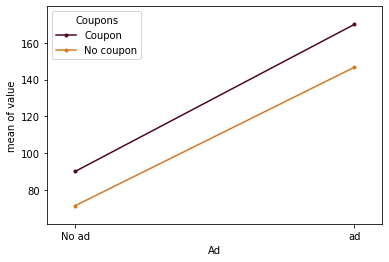

In [466]:
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(x=coupons_melt['Ad'], trace=coupons_melt['Coupons'], response=coupons_melt['value'], 
      colors=['#4c061d','#d17a22'])
plt.show()